In [8]:
%matplotlib inline

In [9]:
import numpy as np
from SLIP import Image, imread

import os

import matplotlib.pyplot as plt

In [15]:
im = Image(pe='https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py')
#image = im.imread('http://images.all-free-download.com/images/wallpapers_large/fire_autumn_wallpaper_autumn_nature_wallpaper_1452.jpg')
image = im.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/260px-PNG_transparency_demonstration_1.png')

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


C:\Users\Malek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


In [16]:
image = image[:-1, :]
print('Size of image', image.shape)

TypeError: 'Image' object is not subscriptable

In [45]:
im.set_size(image.shape)

In [46]:
image.min(), image.max()

(0.0, 0.7036805786132813)

(<Figure size 1350.93x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20f15136400>)

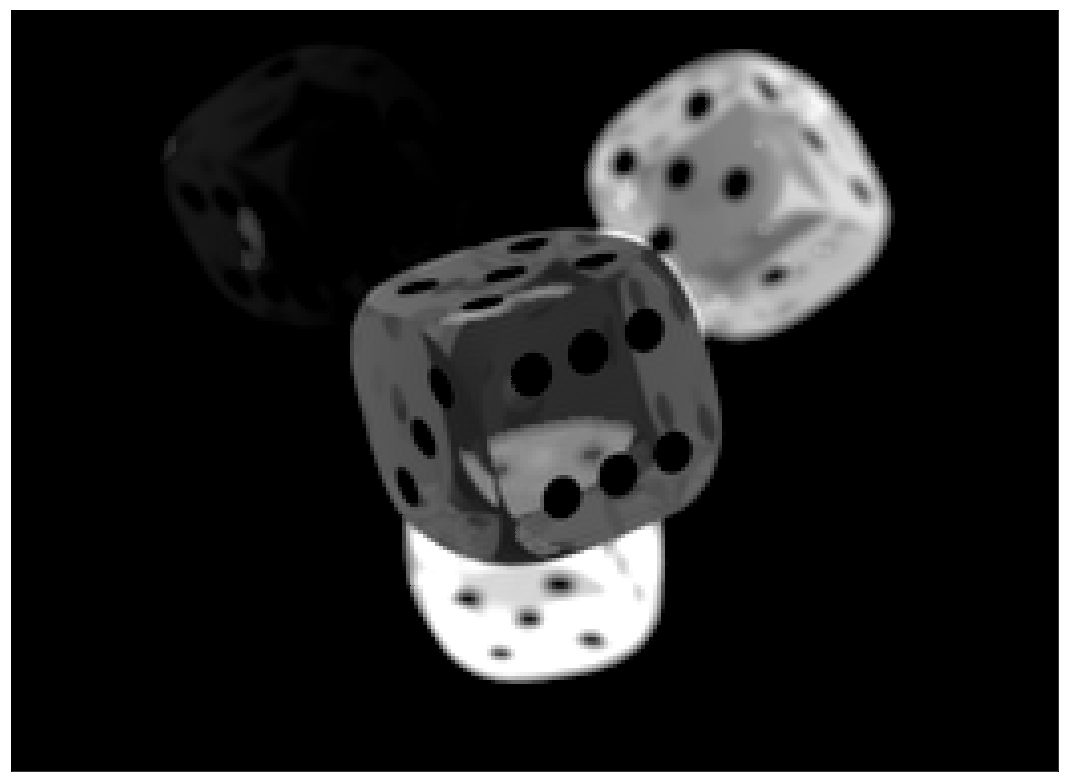

In [48]:
#fig, ax = plt.subplots(figsize=(20,15))
im.imshow(image, vmin=image.min(), vmax=image.max())

In [41]:
white = im.whitening(image)

In [42]:
from LogGabor import LogGabor

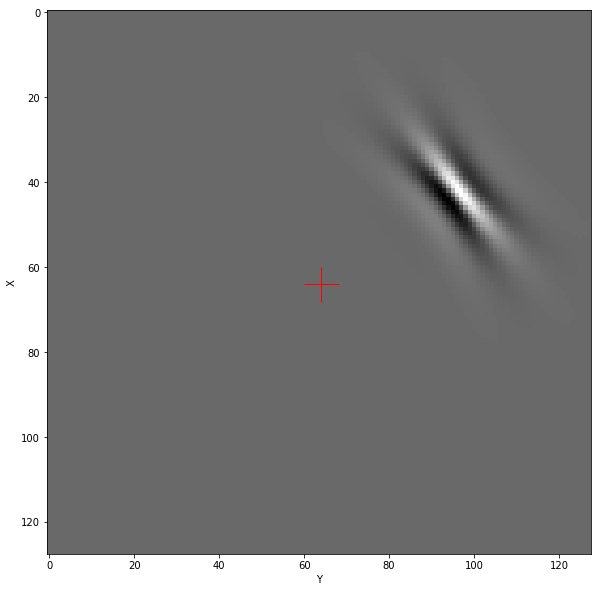

In [43]:
parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
lg = LogGabor(parameterfile)
N_X, N_Y = 128, 128
lg.set_size((N_X, N_Y))
params= {'sf_0':.1, 'B_sf': lg.pe.B_sf, 'theta':np.pi* 5 / 7., 'B_theta': lg.pe.B_theta}
phase = np.pi/4
#loggabor to determine position
#invert ?
#normalise
edge = lg.normalize(lg.invert(lg.loggabor(N_X/3, 3*N_Y/4, **params)*np.exp(-1j*phase)))
#what parameters to change?

fig_width=10
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(edge, cmap=plt.gray())
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.plot([N_Y/2], [N_X/2], 'r+', ms=35);